In [38]:
colmiHeartRatesWalking = ['1747950225,99','1747950096,81','1747949976,100','1747949856,102','1747949736,101','1747949616,100','1747949496,71','1747949376,100','1747949256,105','1747949136,75','1747949016,80','1747948896,108','1747948776,102','1747948656,99','1747948421,78','1747948359,75','1747948296,71','1747948181,80','1747948119,81','1747948056,83','1747947941,78','1747947879,75','1747947816,72','1747947701,74','1747947639,74','1747947577,71','1747947461,94','1747947399,78','1747947336,60','1747947221,98','1747947159,93','1747947096,83','1747946980,88','1747946919,84','1747946858,77','1747946801,89','1747946741,99','1747946044,82','1747945835,76','1747944981,82','1747944848,78','1747944783,71','1747944750,83','1747944664,77','1747944630,78','1747944579,74','1747944523,74','1747944490,81','1747944445,78','1747944349,71','1747944296,72','1747944245,80','1747944158,83','1747944125,79','1747943952,78','1747943896,80','1747943863,80','1747943784,82','1747943731,79','1747943610,76','1747943396,75','1747942947,71','1747942723,77','1747942625,77','1747942492,80','1747942459,86','1747942339,81','1747942252,77','1747942219,83','1747942132,79','1747942099,77','1747941980,78','1747941936,81','1747941890,83','1747941858,74','1747941773,78','1747941740,82','1747941709,81','1747941427,78','1747941389,81','1747941288,82','1747941210,84','1747941179,73','1747941113,79','1747941046,85','1747940817,83','1747940785,82','1747940752,80','1747940695,85','1747940659,88','1747940627,78']
huaweiHeartRatesWalking = ['1747940640,80','1747940880,85','1747941180,83','1747941480,83','1747941540,78','1747941600,79','1747941780,84','1747941840,79','1747942080,74','1747942140,77','1747942380,82','1747942440,82','1747942560,77','1747942620,75','1747942680,81','1747942860,79','1747942980,77','1747943040,76','1747943280,78','1747943460,82','1747943520,92','1747943640,74','1747943880,78','1747944240,70','1747944480,77','1747944840,72','1747944960,79','1747945020,82','1747945080,76','1747945500,75','1747945680,75','1747945740,90','1747946220,81','1747946280,82','1747946460,88','1747946520,76','1747946580,80','1747946700,77','1747946760,86','1747946820,82','1747946880,85','1747947180,91','1747947300,94','1747947480,93','1747947720,98','1747947780,86','1747947900,109','1747948020,104','1747948080,98','1747948440,90','1747948500,90','1747948560,86','1747948620,97','1747948680,101','1747948740,97','1747948860,98','1747948920,100','1747949040,102','1747949160,107','1747949220,108','1747949280,98','1747949400,98','1747949460,95','1747949520,90','1747949580,86','1747949700,85','1747949760,92','1747949820,98','1747949940,111']
huaweiHeartRatesResting = ['1747782900,85','1747783140,84','1747783200,77','1747783260,73','1747783320,92','1747783500,86','1747783620,81','1747783800,84','1747783860,85','1747783980,80','1747784100,80','1747784460,80','1747784700,75','1747784820,80','1747784880,87','1747784940,80','1747785060,79','1747785120,78','1747785420,77','1747785480,71','1747785540,73','1747785660,76','1747785720,74','1747785780,78','1747785960,79','1747786080,78','1747786140,82','1747786260,76','1747786440,75','1747786680,79','1747786740,77']
colmiHeartRatesResting = ['1747786620,78','1747786561,79','1747786501,80','1747786441,77','1747786380,73','1747786321,76','1747786261,78','1747786202,78','1747786143,78','1747786097,81','1747786049,85','1747785316,83','1747784579,79','1747784521,80','1747784462,81','1747784401,82','1747784339,81','1747784281,81','1747784222,81','1747784161,81','1747784099,81','1747784041,82','1747783982,81','1747783921,84','1747783859,89','1747783801,84','1747783742,80','1747783681,82','1747783619,84','1747783561,84','1747783502,84','1747783444,87','1747783385,90','1747783324,86','1747783258,81','1747783207,77','1747783022,83','1747782961,84','1747782899,85']

TestimgMetaData = {'timestamp': '1747831763',
 'delete_url': 'https://ibb.co/5X7CkvQp/1a58c141ffff304f9895340196554cf8',
 'url': 'https://i.ibb.co/LDGBr6Tj/2fb51ca0f210.jpg'}

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
from PIL import Image,ImageOps,ImageDraw,ImageFont
from datetime import datetime
import io

res = (1920,1080)
Rf = ImageFont.truetype('Roboto-Bold.ttf', int(0.02*res[0]))

def convertRawRedisToDF(mesurement_list,label="mesurement"):
    x = []
    y = []
    for mesurement in mesurement_list:
        x.append(datetime.fromtimestamp(int(mesurement.split(",")[0])))
        y.append(int(mesurement.split(",")[1]))
    df = pd.DataFrame({'datetime': x,label: y,})
    return df

def GenerateFrame(Titlefont = Rf, stepsData = None,heartRateData = None,Title = "IRL Stream" ,photo = None, resolution = res, bg_color = (16, 17, 24)):
    outputimg = Image.new("RGBA", resolution, bg_color)
    photores = (1280,720)
    if photo == None:
        photo = Image.new("RGBA", photores, (0, 0, 0))
    pastepos = (int(photores[0]*0.078),int(photores[1]*0.1389))
    outputimg.paste(photo, pastepos, photo)
    draw = ImageDraw.Draw(outputimg)
    titlePos = (int(resolution[0]*0.5)-(len(Title)*10),int(resolution[1]*0.02))
    draw.text(titlePos, Title, fill=(255, 255, 255),stroke_width=1, stroke_fill=(0, 0, 0), font=Titlefont)
                            
    if not heartRateData is None:
        df_hr = convertRawRedisToDF(heartRateData,label="Heartrate")
        hrplot = GenerateMiniPlot(df_hr,dataMaxVal = 40,dataMinVal = 130,title="Heartrate")
        pastepos = (int(resolution[0]*0.7448),int(resolution[1]*0.08))
        outputimg.paste(hrplot, pastepos, hrplot)

    if not stepsData is None:
        df_st = convertRawRedisToDF(stepsData,label="Steps")
        stplot = GenerateMiniPlot(df_st,dataMaxVal = 40,dataMinVal = 130,title= "Steps")
        pastepos = (int(resolution[0]*0.7448),int(resolution[1]*0.45))
        outputimg.paste(stplot, pastepos, stplot)
        
    return outputimg

def GenerateMiniPlot(df_data,dataMaxVal = 40,dataMinVal = 130,title="Mesurement"):
    textcolor = (0.9,0.9,0.9)
    fig = plt.figure(figsize=(5, 3))
    sns.set_style("darkgrid", {"axes.edgecolor":".9","grid.color": ".9","axes.facecolor": (63/255, 65/255, 85/255)})
    df_keys = df_data.keys()
    ax = sns.lineplot(data=df_data,color='black', x=df_keys[0], y=df_keys[1])
    ax.tick_params(axis='x', rotation=-45,labelcolor=textcolor)
    ax.tick_params(axis='y',labelcolor=textcolor)
    ax.set_title(title, color=textcolor)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    if (not dataMaxVal is None) and (not dataMinVal is None) > 0:
        plt.ylim(dataMaxVal, dataMinVal)
    byio = io.BytesIO()
    fig.patch.set_alpha(0)
    plt.savefig(byio, format="png",bbox_inches='tight')
    plt.close(fig)
    img = Image.open(byio).convert("RGBA")
    return img
    
def downloadImgbb(imgJson,saveToStreamLogs = True,finalimgsize=(1280,720)): # (1280,720)
    response = requests.get(imgJson['url'])
    outputimg = Image.new("RGBA", finalimgsize, (0, 0, 0))
    if response.status_code == 200:
        outcenter = (finalimgsize[0]/2,finalimgsize[1]/2)
        img = Image.open(io.BytesIO(response.content)).convert("RGBA")
        img = ImageOps.contain(img,finalimgsize)
        imgcenter = (img.size[0]/2,img.size[1]/2)
        pastepos = (int(outcenter[0]-imgcenter[0]),int(outcenter[1]-imgcenter[1]))
        outputimg.paste(img, pastepos, img)
        draw = ImageDraw.Draw(outputimg)
        fontsize = int(finalimgsize[0]*0.015)
        Rf = ImageFont.truetype('Roboto-Bold.ttf', fontsize)
        dt_obj = datetime.fromtimestamp(int(imgJson['timestamp']))
        format_string = "%d-%m-%Y %H:%M:%S"
        dt_str = dt_obj.strftime(format_string)
        txtpos = (finalimgsize[0]-int(finalimgsize[0]*0.15625),finalimgsize[1]-int(finalimgsize[1]*0.04630))
        draw.text(txtpos, dt_str, fill=(255, 255, 255),stroke_width=1, stroke_fill=(0, 0, 0), font=Rf)
    return outputimg

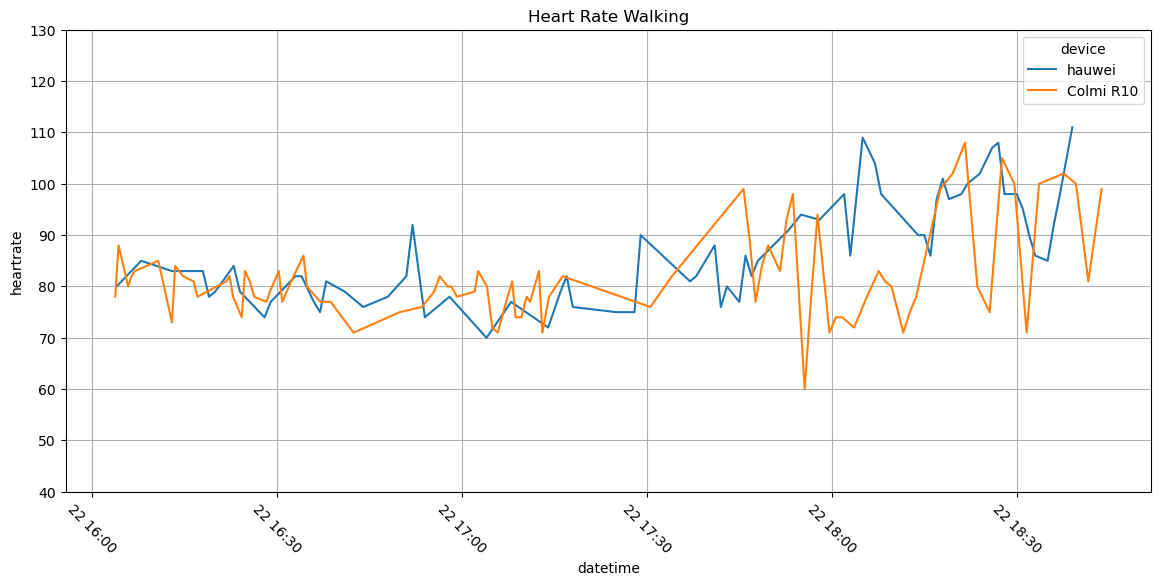

In [39]:
df_colmi = convertRawRedisToDF(colmiHeartRatesWalking,label="heartrate")
df_colmi['device'] = 'Colmi R10'
df_huawei = convertRawRedisToDF(huaweiHeartRatesWalking,label="heartrate")
df_huawei['device'] = 'hauwei' 
df_concatenated = pd.concat([df_huawei, df_colmi], axis=0)

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df_concatenated, x="datetime", y="heartrate", hue="device")
ax.tick_params(axis='x', rotation=-45)
ax.set_title('Heart Rate Walking')
plt.ylim(40, 130)
plt.grid()  #just add this
plt.show()

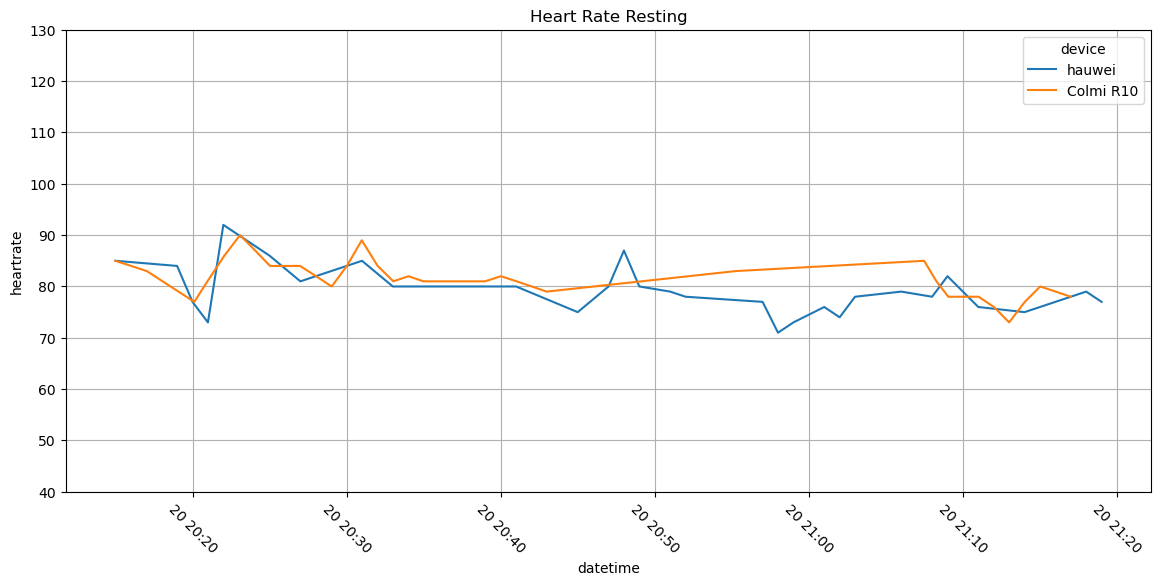

In [47]:
df_colmi = convertRawRedisToDF(colmiHeartRatesResting,label="heartrate")
df_colmi['device'] = 'Colmi R10'
df_huawei = convertRawRedisToDF(huaweiHeartRatesResting,label="heartrate")
df_huawei['device'] = 'hauwei' 
df_concatenated = pd.concat([df_huawei, df_colmi], axis=0)

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df_concatenated, x="datetime", y="heartrate", hue="device")
ax.tick_params(axis='x', rotation=-45)
ax.set_title('Heart Rate Resting')
plt.ylim(40, 130)
plt.grid()  #just add this
plt.show()

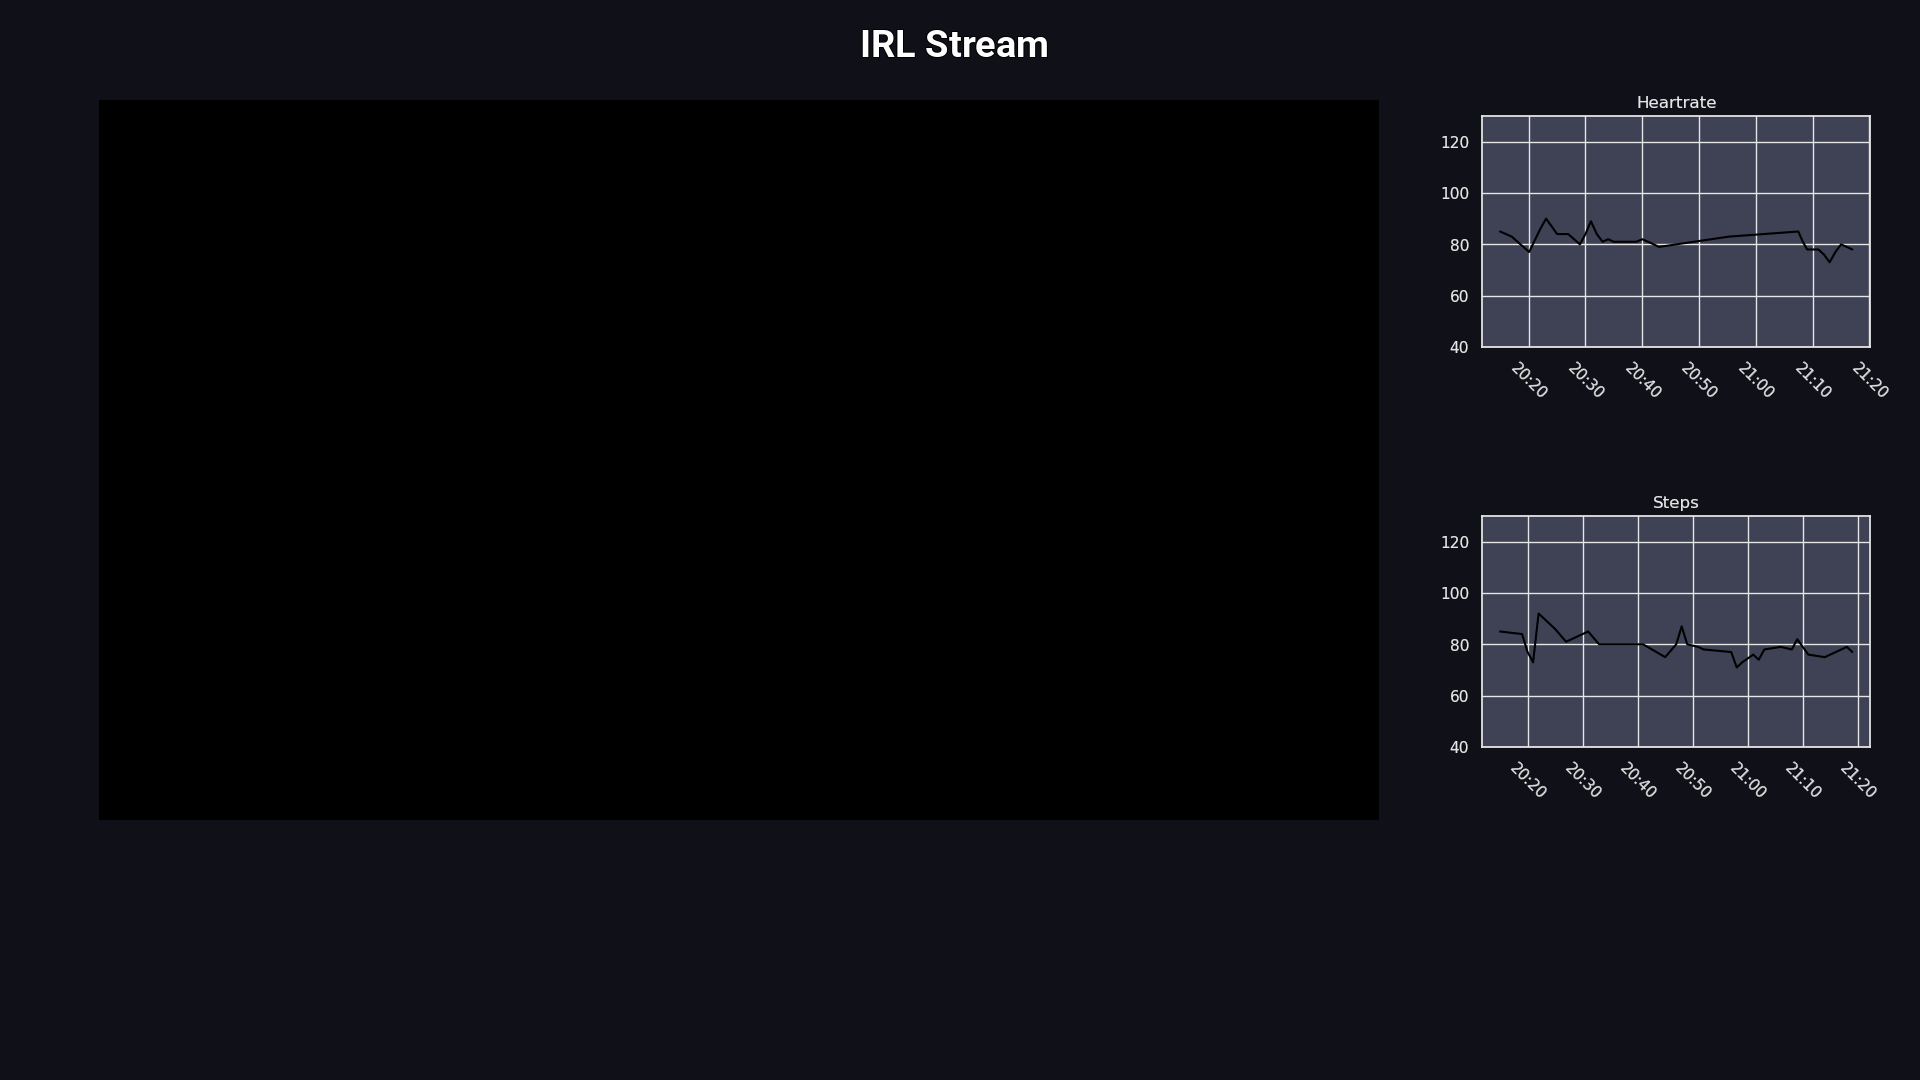

In [207]:
im = GenerateFrame(heartRateData=colmiHeartRatesResting,stepsData=huaweiHeartRatesResting)
im

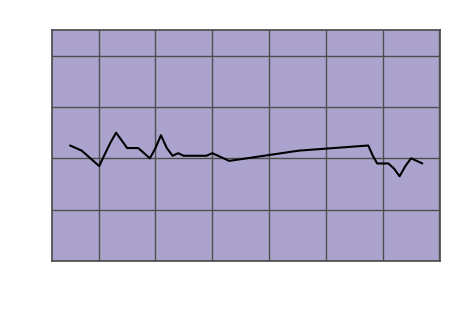

In [159]:
df_colmi = convertRawRedisToDF(colmiHeartRatesResting,label="heartrate")

plt.figure(figsize=(5, 3))
#sns.set_theme(style="darkgrid", palette=None)
sns.set_style("darkgrid", { 
'axes.labelcolor': 'white',
"axes.edgecolor":".3",
"grid.color": ".3",
"axes.facecolor": 
sns.color_palette(palette='PuOr')[4]})

ax = sns.lineplot(data=df_colmi,color='black', x="datetime", y="heartrate")
ax.tick_params(axis='x', rotation=-45,labelcolor='white')
ax.tick_params(axis='y',labelcolor='white')
ax.set_title('Heart Rate', color='white')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.ylim(40, 130)
plt.show()

In [8]:
import redis
from datetime import datetime
import time

r = redis.Redis(
    host='redis-15456.c308.sa-east-1-1.ec2.redns.redis-cloud.com',
    port=15456,
    decode_responses=True,
    username="streamingserver",
    password='E-5X|?]B2:Cy0Lso]"_|PqlE*',
)
r.config_set('notify-keyspace-events', 'KEA')
p = r.pubsub()
p.psubscribe('__keyspace@0__:heartrates')
p.psubscribe('__keyspace@0__:steps')
p.psubscribe('__keyspace@0__:distance')
p.psubscribe('__keyspace@0__:imMetaDataJson')

def getImgJson():
    return r.hgetall('imMetaDataJson')

def getData(r,key):
    return r.lrange(key,0,99)

def getLastDataUpdate(r,key):
    return r.lrange("distance",0,0)[0]
    
def addData(List,data):
    List.insert(0, data)
    List.pop()

while True:
    message = p.get_message()

    if message:
        key = message['channel'].split('__keyspace@0__:')[1]
        #print(message)
        if message['data'] == 'lpush':
                dataUpdate = getLastDataUpdate(r,key) 
                #print(key,":",dataUpdate)
        elif message['data'] == 'hset':
            if key == 'imMetaDataJson':
                print(r.hgetall('imMetaDataJson'))
    else:
        time.sleep(0.01)

window.close()

{'type': 'psubscribe', 'pattern': None, 'channel': '__keyspace@0__:heartrates', 'data': 1}
{'type': 'psubscribe', 'pattern': None, 'channel': '__keyspace@0__:steps', 'data': 2}
{'type': 'psubscribe', 'pattern': None, 'channel': '__keyspace@0__:distance', 'data': 3}
{'type': 'psubscribe', 'pattern': None, 'channel': '__keyspace@0__:imMetaDataJson', 'data': 4}
{'type': 'pmessage', 'pattern': '__keyspace@0__:distance', 'channel': '__keyspace@0__:distance', 'data': 'ltrim'}
{'type': 'pmessage', 'pattern': '__keyspace@0__:steps', 'channel': '__keyspace@0__:steps', 'data': 'lpush'}
{'type': 'pmessage', 'pattern': '__keyspace@0__:steps', 'channel': '__keyspace@0__:steps', 'data': 'ltrim'}
{'type': 'pmessage', 'pattern': '__keyspace@0__:distance', 'channel': '__keyspace@0__:distance', 'data': 'lpush'}
{'type': 'pmessage', 'pattern': '__keyspace@0__:distance', 'channel': '__keyspace@0__:distance', 'data': 'ltrim'}
{'type': 'pmessage', 'pattern': '__keyspace@0__:imMetaDataJson', 'channel': '__ke

KeyboardInterrupt: 